 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from scipy.stats import pearsonr

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
print(whale_returns.isnull().sum().sum())

4


In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
print(whale_returns)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

In [5]:
# whale_returns_graph = whale_returns.subplots()
# whale_returns.plot(date, soros_fund_mangement_llc, label = "soros_fund_mangement_llc") 
# whale_returns.legend()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
print(algo_returns.isnull().sum().sum())

6


In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)
print(algo_returns)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sp500_history.dtypes 

Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype(float)

C:\Users\Dronp\AppData\Local\Temp\ipykernel_46908\4014944048.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')


In [12]:
# Calculate Daily Returns
sp500_history_returns = sp500_history.pct_change()
sp500_history_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [13]:
# Drop nulls
sp500_history_returns.dropna(inplace=True)
sp500_history_returns

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_returns = sp500_history_returns.rename(columns={'Close':'S&P'})
sp500_history_returns

,S&P
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# combined_data = [sp500_history_returns, algo_returns, whale_returns]
combined_data_returns = pd.concat([sp500_history_returns, algo_returns, whale_returns], axis="columns", join="inner")
combined_data_returns.sort_values(by='Date', axis=0, inplace=True)
combined_data_returns

,S&P,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

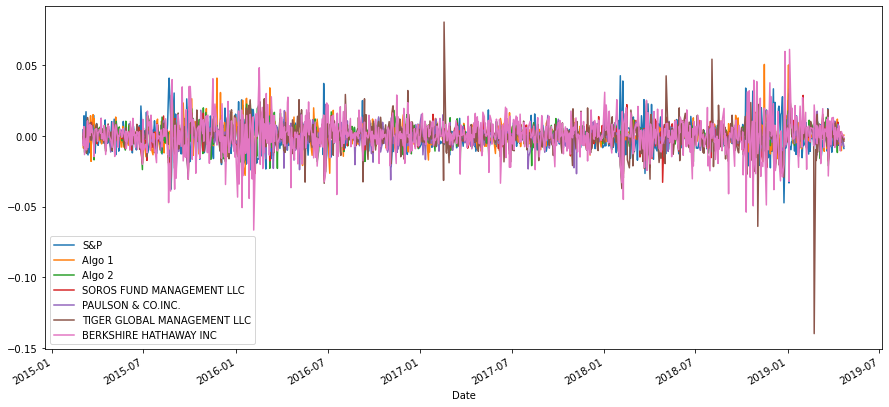

In [16]:
# Plot daily returns of all portfolios
combined_data_returns.plot(figsize = (15,7))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

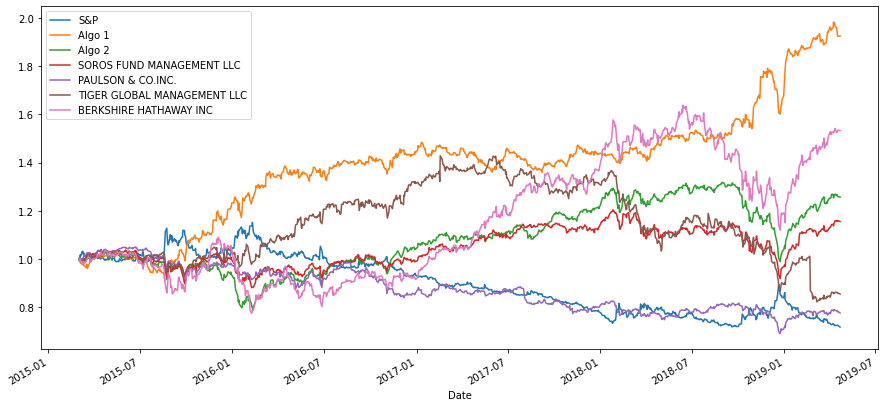

In [17]:
# Calculate cumulative returns of all portfolios
combined_data_cumulative_returns = (1 + combined_data_returns).cumprod()

# Plot cumulative returns
combined_data_cumulative_returns.plot(figsize=(15,7))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

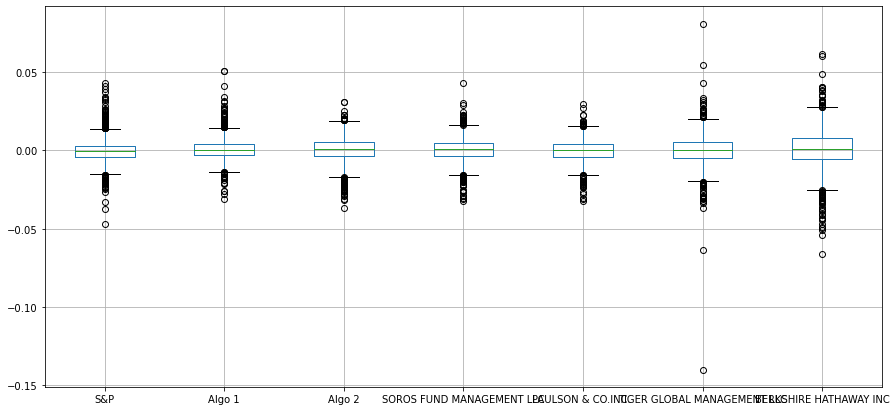

In [18]:
# Box plot to visually show risk
combined_data_returns.boxplot(figsize=(15,7))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_data_std = combined_data_returns.std()
combined_data_std.head

<bound method NDFrame.head of S&P                            0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64>

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
S_P_std = combined_data_returns['S&P'].std()
S_P_std
# Determine which portfolios are riskier than the S&P 500
combined_data_std>S_P_std

S&P                            False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_combined_data_returns = combined_data_returns.rolling(window=252).std()
annualized_combined_data_returns

,S&P,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,0.009487,0.008196,0.008608,0.009406,0.007337,0.014707,0.015248
2019-04-16,0.009466,0.008211,0.008598,0.009383,0.007333,0.014700,0.015245
2019-04-17,0.009466,0.008240,0.008592,0.009375,0.007339,0.014696,0.015200


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

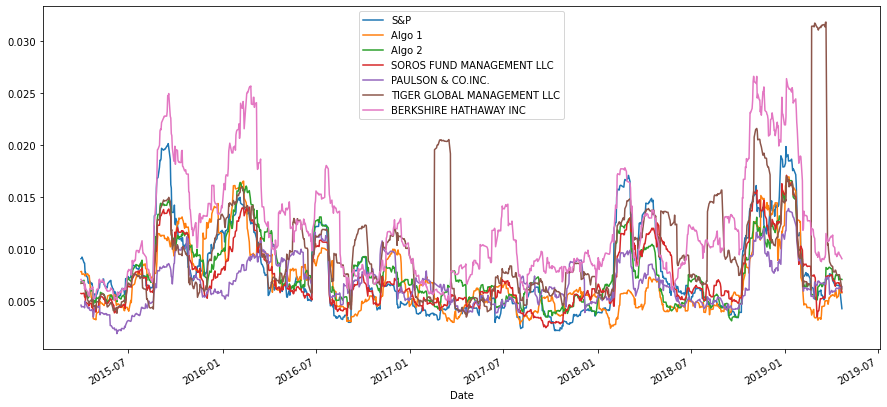

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_data_returns_window = combined_data_returns.rolling(window=21).std()
combined_data_returns_window

# Plot the rolling standard deviation
combined_data_returns_window.plot(figsize = (15,7))


### Calculate and plot the correlation

In [23]:
# Calculate the correlation
combined_data_correlation = combined_data_returns.corr()
combined_data_correlation

# Display de correlation matrix
combined_data_matrix = np.corrcoef(combined_data_returns)
combined_data_matrix

array([[ 1.        , -0.38752799,  0.49119148, ..., -0.13144023,
        -0.70910311, -0.4328621 ],
       [-0.38752799,  1.        ,  0.36806124, ...,  0.65385677,
         0.5013059 , -0.2814551 ],
       [ 0.49119148,  0.36806124,  1.        , ...,  0.63027387,
        -0.16282041, -0.70427259],
       ...,
       [-0.13144023,  0.65385677,  0.63027387, ...,  1.        ,
         0.46114806, -0.15205076],
       [-0.70910311,  0.5013059 , -0.16282041, ...,  0.46114806,
         1.        ,  0.08436587],
       [-0.4328621 , -0.2814551 , -0.70427259, ..., -0.15205076,
         0.08436587,  1.        ]])

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [24]:
# Calculate covariance of a single portfolio
algo_covariance = algo_returns.cov()
algo_covariance

# Calculate variance of S&P 500
variance_SP = sp500_history.var()
variance_SP

# Computing beta
portfolio_beta = 'algo_covariance' / 'variance_SP'
portfolio_beta 

# Plot beta trend
portfolio_beta.plot 


TypeError: unsupported operand type(s) for /: 'str' and 'str'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
stocks_sharpe_ratios = (combined_data_returns.mean() * 252) / (combined_data_returns.std() * np.sqrt(252))
stocks_sharpe_ratios

S&P                           -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
dtype: float64

In [26]:
# Visualize the sharpe ratios as a bar plot
stocks_sharpe_ratios.bar()

AttributeError: 'Series' object has no attribute 'bar'

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
doma_stock = path("Doma_history.csv")
doma_stock = pd.read_csv(Doma_history)
doma_stock.head

NameError: name 'path' is not defined

In [28]:
# Reading data from 2nd stock
Faraday_Future_stock = path("FFIE_history.csv")
Faraday_Future_stock = pd.read_csv(FFIE_history)
Faraday_Future_stock.head

NameError: name 'path' is not defined

In [29]:
# Reading data from 3rd stock
Redbox_stock = path("Redbox_history.csv")
Redbox_stock = pd.read_csv(Redbox_history)
Redbox_stock.head

NameError: name 'path' is not defined

In [30]:
# Combine all stocks in a single DataFrame
combined_data_stocks = pd.concat(doma_stock, Faraday_Future_stock, Redbox_stock)

NameError: name 'doma_stock' is not defined

In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns
combined_data_stocks.pct_change()

# Drop NAs
combined_data_stocks.dropna(inplace=True)

# Display sample data
combined_data_stocks.head()


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = (weights * combined_data_stocks)

# Display sample data
print(weighted_returns.head())


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat(weighted_returns, combined_data_stocks)

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
anualized_all_returns = anualized_all_returns.std()
anualized_all_returns

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation
all_returns_window = all_returns.rolling(window=21).std()
all_returns_window
# Plot rolling standard deviation
all_returns_window.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation
portfolios_correlation_personal = df['all_returns']
all_corr, _ = pearsonr(portfolios_correlation_personal)
print('Pearsons correlation: %.3f' % all_corr)

all_corr.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance_returns = all_returns.rolling(window=60).cov()
covariance_returns
variance_returns = all_returns.var()
variance_returns

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_all = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios_all

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.bar()

### How does your portfolio do?

Write your answer here!